# 2.0 Process modeling
## 2.2 Gravity Drained Tank

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

이 예제에서는 중력 배수 탱크의 액체 레벨에 대한 비선형 프로세스 모델을 구축하는 문제를 연구합니다.

Torricelli's law

토리첼리의 법칙에 따르면 표면 아래 $h$ 레벨에서 액체 탱크를 빠져나가는 비압축성 액체 흐름의 속도는 다음과 같습니다.

$$v = \sqrt{2gh}$$ 

이것은 높이 $h$에서 물체를 떨어뜨렸을 때와 같은 속도입니다. 도출 방법은 간단합니다. 베르누이의 원리를 이용하면 됩니다,

$$\frac{v^2}{2} + gh + \frac{P}{\rho} = \text{constant}$$

이 원리를 적용하여, 출구 위 $h$ 거리에서 수면 바로 아래에 있는 물 한 방울과 수조에서 빠져나가는 물 한 방울을 비교합니다.

$$gh + \frac{P_{atm}}{\rho} = \frac{v^2}{2} + \frac{P_{atm}}{\rho}$$

$$\implies v^2 = 2gh$$
$$\implies v = \sqrt{2gh}$$

토리첼리의 법칙은 유체 점도, 출구 근처의 특정 유동 형상 또는 기타 유동 비이상성의 영향을 고려하지 않은 근사치입니다. 그럼에도 불구하고 탱크에서 나오는 흐름에 대한 유용한 첫 번째 근사치입니다.

## Mass Balance for Tank with Constant Cross-Sectional Area

원통형 또는 직사각형 탱크와 같이 단면적이 일정한 탱크의 경우 액체 높이는 미분 방정식으로 설명됩니다.

$$A\frac{dh}{dt} = q_{in}(t) - q_{out}(t)$$

여기서 $q_{out}$는 액체 높이의 함수입니다. 토리첼리의 법칙에 따르면 탱크에서 배출되는 유량은 액체 높이의 제곱근에 비례합니다.

$$ q_{out}(h) = C_v\sqrt{h} $$

면적으로 나누면 비선형 편미분 방정식을 구할 수 있습니다. 

$$ \frac{dh}{dt} = - \frac{C_V}{A}\sqrt{h} + \frac{1}{A}q_{in}(t) $$

에서 LHS 도함수가 상수 계수 1로 나타나는 표준 형식입니다.

## Step-by-Step Approach to Nonlinear Simulation

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Define parameters

In [3]:
Cv  = 0.1     # Outlet valve constant [cubic meters/min/meter^1/2]
A   = 1.0     # Tank area [meter^2]

Write Functions for the RHS of the Differential Equations

In [4]:
# inlet flow rate in cubic meters/min
def qin(t):
    return 0.15

def deriv(h,t):
    return qin(t)/A - Cv*np.sqrt(h)/A

Choose an Initial Condition, a Time Grid, and Integrate the Differential Equation

In [5]:
IC = [0.0]
t = np.linspace(0,200,101)
h = odeint(deriv,IC,t)

Visualize and Analyze Results

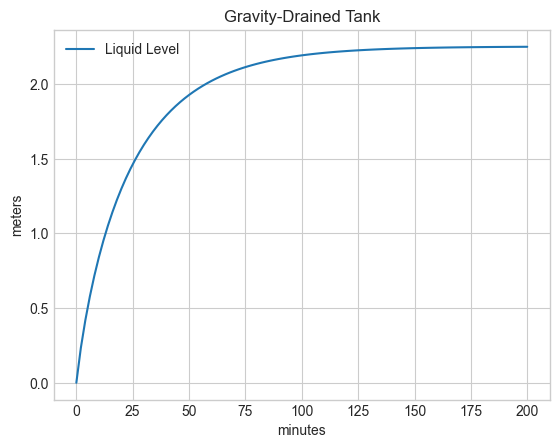

In [6]:
plt.plot(t,h)

plt.xlabel('minutes')
plt.ylabel('meters')
plt.title('Gravity-Drained Tank')
plt.legend(['Liquid Level']);